In [2]:
import numpy as np

In [319]:
class OnlineHistCounter():
    def __init__(self, bin_num=1000):
        self.bin_num = bin_num
        self.bins = None
        self.hist = None
        self.eps = 1e6
        self.bound = (-10, 10)

    def append(self, arr: np.ndarray):
        if self.bins is None:
            self.hist, self.bins = np.histogram(arr, self.bin_num, range=self.bound)
            return
        
        # if  min(arr) < self.bins[0] or self.bins[-1] < max(arr):
        #     bound = (min(min(arr), self.bins[0]), max(self.bins[-1], max(arr)))
        #     new_hist, new_bins = np.histogram(arr, self.bin_num)
        #     new_cntrs = new_bins[:-1]
        #     new_cntrs[:-1] += (new_bins[1] - new_bins[0]) / 2  - self.eps
        #     new_cntrs[-1] += (new_bins[1] - new_bins[0]) / (2)

        #     old_cntrs = self.bins[:-1] 
        #     old_cntrs[:-1] += (self.bins[1] - self.bins[0]) / 2 -  self.eps
        #     old_cntrs[-1] += (self.bins[1] - self.bins[0]) / (2)

        #     union_cntrs = np.concatenate([new_cntrs, old_cntrs])
        #     union_hist = np.concatenate([new_hist, self.hist])

        #     self.hist, self.bins = np.histogram(union_cntrs,
        #                                         bins=self.bin_num,
        #                                         weights=union_hist,
        #                                         # range=bound
        #                                         )
        #     return
        
        self.hist += np.histogram(arr, self.bins, range=self.bound)[0]

In [320]:
import matplotlib.pyplot as plt

In [321]:
h = OnlineHistCounter(50)
a = []
for i in range(1000):
    b = np.random.normal(size=20).tolist()
    a += b
    h.append(b)

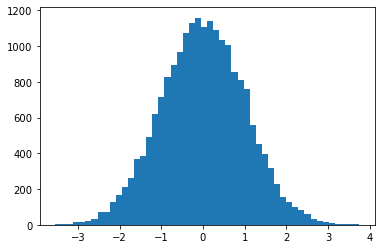

In [322]:
plt.hist(a, bins=50)
plt.show()

In [338]:
cs = np.cumsum(h.hist)
l = np.searchsorted(cs, np.percentile(cs, 1, interpolation="higher"))
r = np.searchsorted(cs, np.percentile(cs, 99))
l, r

(0, 34)

In [342]:
np.histogram([1, 1.5, 33], bins=[-1, 2])

(array([2], dtype=int64), array([-1,  2]))

In [343]:
str("d")

'd'

In [328]:
plt.bar(x=h.bins[:-1][l:r], height=h.hist[l:r], width=np.diff(h.bins))


TypeError: bar() missing 1 required positional argument: 'x'

In [317]:
len(a)

20000

In [318]:
sum(h.hist)

19998